In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


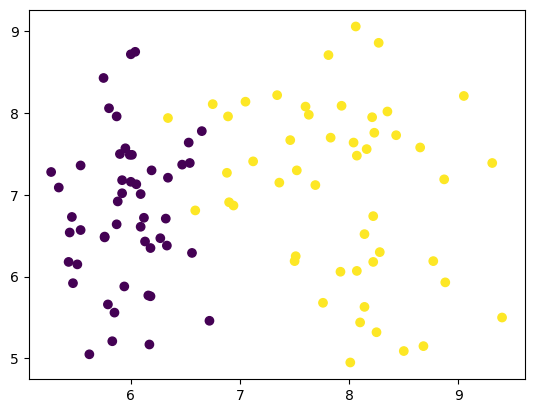

In [5]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[-0.14597732,  0.01314729, -0.34990567, -0.19447738, -0.5750093 ,
         -0.69554317, -0.01355189, -0.17416072,  0.11371928, -0.48316592],
        [ 0.1603325 ,  0.45276636, -0.2607541 , -0.02609617,  0.2333821 ,
         -0.23093218,  0.35947758,  0.24926203, -0.203385  ,  0.1670227 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.11848116,  0.1631391 ,  0.22308207, -0.38824788, -0.19293573,
         -0.21648556, -0.3335091 ,  0.08991402, -0.07820347, -0.26078716],
        [-0.20236829, -0.49932146, -0.39825007, -0.24171764, -0.10765925,
         -0.08699632,  0.24429607,  0.3029052 ,  0.4753914 ,  0.35284555],
        [ 0.38286924, -0.13235253,  0.07042176,  0.34033257, -0.08963457,
         -0.5028834 , -0.08369648,  0.5410154 ,  0.41752684,  0.15030122],
        [ 0.21826482, -0.19796726,  0.05542254, -0.4947082 ,  0.1699431 ,
          0.2357716 , -0.3246468 ,  0.23433316,  0.2712686 ,  0.40906978],
        [ 0.45784

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[ 0.01152953,  0.30873507,  1.0851285 , -0.05361135, -1.1822046 ,
          1.0279733 ,  0.38701117,  0.537786  , -0.20404828, -0.2867233 ],
        [-0.0550064 ,  0.469897  ,  1.0297301 , -0.45799008, -0.11129095,
          0.34009722, -1.1169951 , -0.7808496 , -0.4906459 ,  0.59721553]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.4310452 ,  0.60138756,  0.05507608,  0.416762  , -0.03403006,
         -0.15403558,  0.3910065 , -0.23407003, -0.12808618, -0.17360799],
        [-0.01204129, -0.2496475 ,  0.202358  , -0.09398184,  0.2899125 ,
          0.02544211, -0.18774012, -0.08348195,  0.56008476,  0.49319118],
        [ 0.27487582, -0.12748793,  0.4817018 ,  0.27183738,  0.5017305 ,
          0.4189973 ,  0.44578847,  0.1654399 , -0.05258033, -0.08508854],
        [-0.14725807,  0.03054606,  0.2261693 , -0.46246418,  0.3085544 ,
         -0.2676077 ,  0.25915068, -0.08389534, -0.06896938, -0.0838536 ],
        [ 0.00851

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.5211 - loss: 0.6973 - val_accuracy: 0.5500 - val_loss: 0.6922
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4781 - loss: 0.6968 - val_accuracy: 0.5500 - val_loss: 0.6918
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4938 - loss: 0.6940 - val_accuracy: 0.5500 - val_loss: 0.6910
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5477 - loss: 0.6923 - val_accuracy: 0.6500 - val_loss: 0.6902
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5344 - loss: 0.6906 - val_accuracy: 0.4500 - val_loss: 0.6892
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5258 - loss: 0.6894 - val_accuracy: 0.4500 - val_loss: 0.6883
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4984 - loss: 0.6877 - val_accuracy: 0.4500 - val_loss: 0.6860
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5102 - loss: 0.6856 - val_accuracy: 0.4500 - val_loss

In [16]:
model.get_weights()

[array([[-0.05680773, -0.00131652,  1.0851285 ,  0.09119744, -1.263388  ,
          1.0883739 ,  0.45583677,  0.708526  , -0.39486247, -0.21611257],
        [-0.04570182,  0.14574887,  1.0297301 , -0.22306998, -0.19613053,
          0.402563  , -1.0514444 , -0.6079383 , -0.67688096,  0.59992874]],
       dtype=float32),
 array([ 0.14298902, -0.37911072,  0.        ,  0.33130574, -0.01839027,
         0.01300021,  0.06375156,  0.04398566, -0.17584547, -0.00327477],
       dtype=float32),
 array([[ 3.33781511e-01,  6.70993865e-01, -4.80499230e-02,
          2.92004049e-01,  2.09663197e-01, -2.17940614e-01,
          4.97567356e-01, -3.36062402e-01, -5.77125810e-02,
         -2.88069636e-01],
        [-2.39773616e-02, -2.05210626e-01,  1.87374160e-01,
         -8.40491280e-02,  1.49720952e-01, -2.81055570e-02,
         -1.72980830e-01, -5.92053607e-02,  5.84267974e-01,
          5.37999511e-01],
        [ 2.42926672e-01, -5.60660474e-02,  4.45095628e-01,
          2.60919631e-01,  3.89331

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

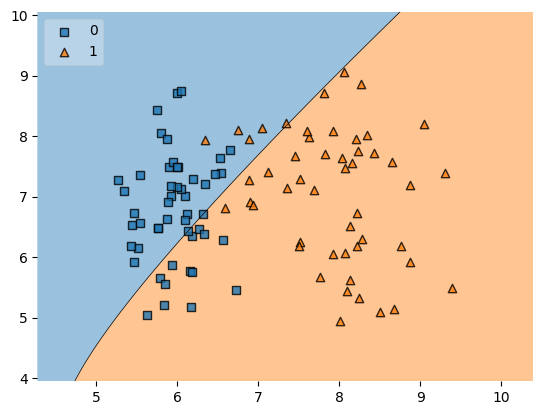

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)